### Innercore Lightning

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import median_abs_deviation

c:\Users\april\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
file_path = r"C:\Users\april\Documents\MSDS\Capstone\WWLLN_innercore_timebin_count.csv"

df = pd.read_csv(file_path)

print(df.head())
print(df.shape)

  storm_code             time_bin  lightining_count
0   ATL_10_1  2010-06-21 07:00:00                 1
1   ATL_10_1  2010-06-23 14:30:00                 1
2   ATL_10_1  2010-06-23 15:00:00                 3
3   ATL_10_1  2010-06-23 16:30:00                 2
4   ATL_10_1  2010-06-23 22:30:00                 4
(58150, 3)


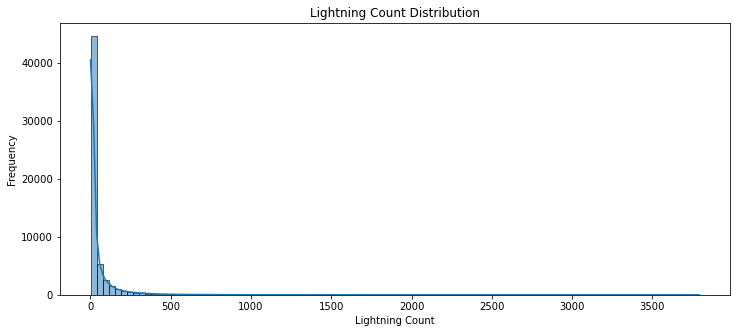

In [4]:
#checking for skewness of the lightning count

plt.figure(figsize=(12, 5))
sns.histplot(df['lightining_count'], bins=100, kde=True)
plt.title('Lightning Count Distribution')
plt.xlabel('Lightning Count')
plt.ylabel('Frequency')
plt.show()

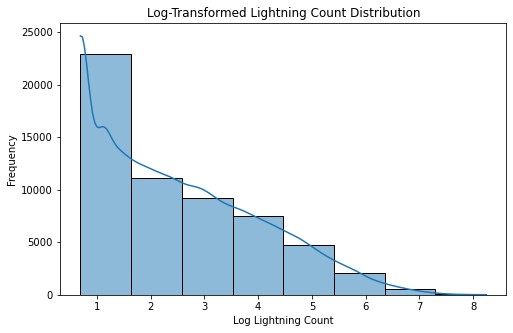

In [5]:
# Apply log transformation (adding 1 to avoid log(0) issues)
df['log_lightning_count'] = np.log1p(df['lightining_count'])

# Plot the transformed data
plt.figure(figsize=(8, 5))
sns.histplot(df['log_lightning_count'], bins=8, kde=True)
plt.title('Log-Transformed Lightning Count Distribution')
plt.xlabel('Log Lightning Count')
plt.ylabel('Frequency')
plt.show()


In [6]:
def detect_bursts_iqr(group):
    Q1 = group['log_lightning_count'].quantile(0.25)
    Q3 = group['log_lightning_count'].quantile(0.75)
    IQR = Q3 - Q1

    # Set burst threshold for each cyclone individually
    upper_threshold1 = Q3 + 1 * IQR
    upper_threshold2 = Q3 + 1.5* IQR

    # Mark bursts specific to the cyclone
    group['burst_iqr1'] = group['log_lightning_count'] > upper_threshold1
    group['burst_iqr2'] = group['log_lightning_count'] > upper_threshold2
    return group


df = df.groupby('storm_code', group_keys=False).apply(detect_bursts_iqr)

# Check total number of burst detection
print(df['burst_iqr1'].sum())
print(df['burst_iqr2'].sum())

1274
322


In [19]:
def detect_bursts_mad(group):
    median_log = group['log_lightning_count'].median()
    mad_log = median_abs_deviation(group['log_lightning_count'])

    # Set burst threshold based on MAD for each cyclone
    threshold1 = median_log + 4 * mad_log
    threshold2 = median_log + 5 * mad_log

    # Mark bursts specific to the cyclone
    group['burst_mad_1'] = group['log_lightning_count'] > threshold1
    group['burst_mad_2'] = group['log_lightning_count'] > threshold2
    return group

df = df.groupby('storm_code', group_keys=False).apply(detect_bursts_mad)

print(df['burst_mad_1'].sum())
print(df['burst_mad_2'].sum())




1001
555


In [20]:
comparison = df.groupby('storm_code')[['burst_iqr1','burst_iqr2', 'burst_mad_1','burst_mad_2']].sum()

print(comparison)

            burst_iqr1  burst_iqr2  burst_mad_1  burst_mad_2
storm_code                                                  
ATL_10_1             1           0            0            0
ATL_10_11            8           4           14           11
ATL_10_12            0           0            0            0
ATL_10_13            7           0            0            0
ATL_10_14            4           0            5            1
...                ...         ...          ...          ...
WPAC_20_22          10           2            1            0
WPAC_20_25           3           2            4            3
WPAC_20_3            0           0            0            0
WPAC_20_7            1           0            0            0
WPAC_20_9            3           3            3            3

[472 rows x 4 columns]


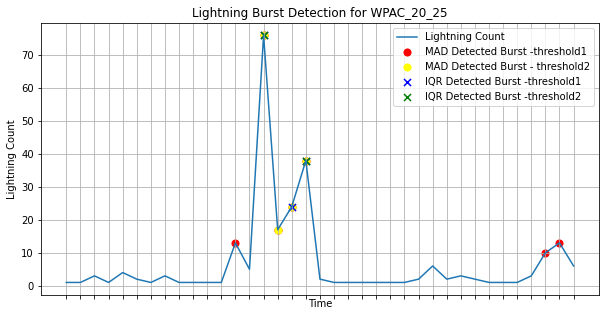

In [17]:
# Select a specific cyclone to visualize
cyclone_id = 'WPAC_20_25'
df_cyclone = df[df['storm_code'] == cyclone_id]

plt.figure(figsize=(10, 5))
plt.plot(df_cyclone['time_bin'], df_cyclone['lightining_count'], label='Lightning Count')

# Mark bursts detected by MAD
plt.scatter(df_cyclone['time_bin'][df_cyclone['burst_mad_1']], 
            df_cyclone['lightining_count'][df_cyclone['burst_mad_1']], 
            color='red', label='MAD Detected Burst -threshold1', s=50, marker='o')
plt.scatter(df_cyclone['time_bin'][df_cyclone['burst_mad_2']], 
            df_cyclone['lightining_count'][df_cyclone['burst_mad_2']], 
            color='yellow', label='MAD Detected Burst - threshold2', s=50, marker='o')

# Mark bursts detected by IQR
plt.scatter(df_cyclone['time_bin'][df_cyclone['burst_iqr1']], 
            df_cyclone['lightining_count'][df_cyclone['burst_iqr1']], 
            color='blue', label='IQR Detected Burst -threshold1', s=50, marker='x')
plt.scatter(df_cyclone['time_bin'][df_cyclone['burst_iqr2']], 
            df_cyclone['lightining_count'][df_cyclone['burst_iqr2']], 
            color='green', label='IQR Detected Burst -threshold2', s=50, marker='x')

plt.xlabel('Time')
plt.ylabel('Lightning Count')
plt.title(f'Lightning Burst Detection for {cyclone_id}')
plt.legend()
plt.xticks(visible=False)
plt.grid()
plt.show()

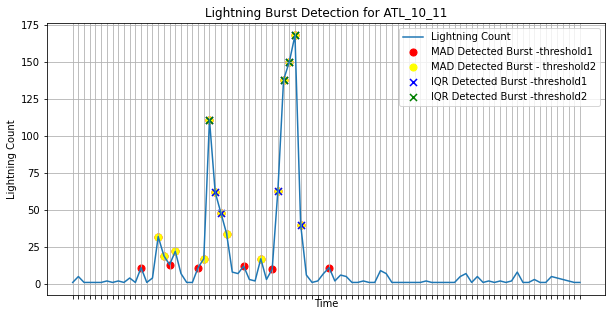

In [12]:
# Select a specific cyclone to visualize
cyclone_id = 'ATL_10_11'
df_cyclone = df[df['storm_code'] == cyclone_id]

plt.figure(figsize=(10, 5))
plt.plot(df_cyclone['time_bin'], df_cyclone['lightining_count'], label='Lightning Count')

# Mark bursts detected by MAD
plt.scatter(df_cyclone['time_bin'][df_cyclone['burst_mad_1']], 
            df_cyclone['lightining_count'][df_cyclone['burst_mad_1']], 
            color='red', label='MAD Detected Burst -threshold1', s=50, marker='o')
plt.scatter(df_cyclone['time_bin'][df_cyclone['burst_mad_2']], 
            df_cyclone['lightining_count'][df_cyclone['burst_mad_2']], 
            color='yellow', label='MAD Detected Burst - threshold2', s=50, marker='o')

# Mark bursts detected by IQR
plt.scatter(df_cyclone['time_bin'][df_cyclone['burst_iqr1']], 
            df_cyclone['lightining_count'][df_cyclone['burst_iqr1']], 
            color='blue', label='IQR Detected Burst -threshold1', s=50, marker='x')
plt.scatter(df_cyclone['time_bin'][df_cyclone['burst_iqr2']], 
            df_cyclone['lightining_count'][df_cyclone['burst_iqr2']], 
            color='green', label='IQR Detected Burst -threshold2', s=50, marker='x')

plt.xlabel('Time')
plt.ylabel('Lightning Count')
plt.title(f'Lightning Burst Detection for {cyclone_id}')
plt.legend()
plt.xticks(visible=False)
plt.grid()
plt.show()